# Fast.ai - Image Classificayion

My follow through of the fast.ai deep learning course. The aim is to follow along with the course using my own examples. Hopefully attempt a few Kaggle competitions along the way.

## First Challenge -------------------------------------------------------------
Run fast.ai on an image classification problem on Kaggle

I found a nice Bird classfication dataset :)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

#### Upload data into paperspace gradient notebook

Paperspace offers free gpu servers which I am currently using untill I am more confident to purchase paid servers. The first challenge I encountered was how to uploaded big datasets onto your gpu server. 

The best method I found was to upload a zip file into then open the terminel in your online server and unzip your folder from within

In [10]:
path = Path('../../../storage/Birds/BIRDS-120//consolidated'); path

PosixPath('../../../storage/Birds/BIRDS-120/consolidated')

In [11]:
# Check everything is as expected 
path.ls()

[PosixPath('../../../storage/Birds/BIRDS-120/consolidated/MANDRIN DUCK'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/OSTRICH'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/PARADISE TANAGER'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/SCARLET MACAW'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/INDIGO BUNTING'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/HOOPOES'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/WOOD DUCK'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/BAR-TAILED GODWIT'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/LARK BUNTING'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/GREY PLOVER'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/WILSONS BIRD OF PARADISE'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/PARUS MAJOR'),
 PosixPath('../../../storage/Birds/BIRDS-120/consolidated/YELLOW HEADED BLACKBIRD'),
 PosixPath('../../

### View Data

Keeping the basic transformations from the fast.ai v3 lessons to start with. Splitting the data into a training the testing 80/20 split

In [15]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ALBATROSS',
  'ALEXANDRINE PARAKEET',
  'AMERICAN GOLDFINCH',
  'AMERICAN KESTREL',
  'AMERICAN REDSTART',
  'ANNAS HUMMINGBIRD',
  'BALD EAGLE',
  'BALTIMORE ORIOLE',
  'BANANAQUIT',
  'BAR-TAILED GODWIT',
  'BARN OWL',
  'BARN SWALLOW',
  'BAY-BREASTED WARBLER',
  'BELTED KINGFISHER',
  'BIRD OF PARADISE',
  'BLACK SKIMMER',
  'BLACK-CAPPED CHICKADEE',
  'BLACK-NECKED GREBE',
  'BLACKBURNIAM WARBLER',
  'BLUE HERON',
  'BOBOLINK',
  'BROWN THRASHER',
  'CACTUS WREN',
  'CALIFORNIA CONDOR',
  'CALIFORNIA GULL',
  'CALIFORNIA QUAIL',
  'CAPE MAY WARBLER',
  'CHARA DE COLLAR',
  'CHIPPING SPARROW',
  'CINNAMON TEAL',
  'COCK OF THE  ROCK',
  'COCKATOO',
  'COMMON LOON',
  'COUCHS KINGBIRD',
  'CRESTED AUKLET',
  'CRESTED CARACARA',
  'CROW',
  'CROWNED PIGEON',
  'CURL CRESTED ARACURI',
  'DARK EYED JUNCO',
  'DOWNY WOODPECKER',
  'EASTERN BLUEBIRD',
  'EASTERN ROSELLA',
  'EASTERN TOWEE',
  'ELEGANT TROGON',
  'EMPEROR PENGUIN',
  'EVENING GROSBEAK',
  'FLAME TANAGER',
  'FLAMINGO',

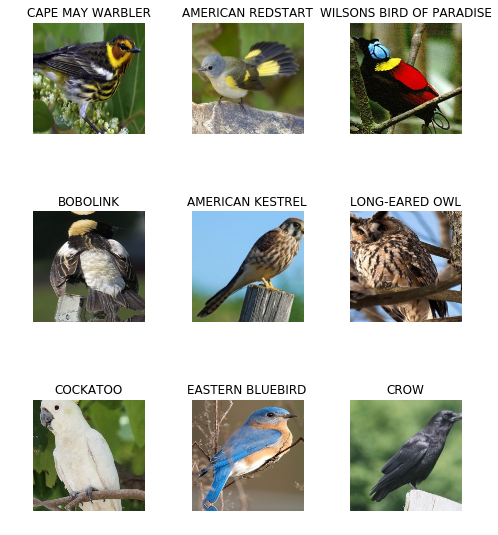

In [19]:
data.show_batch(rows=3, figsize=(7,8))

### Train Model

Stage-1 just attempts a simple resnet34 CNN which is a good first attempt to evaluate our current standings on the problem. 


We can see that my training lose is higher than my validation loss (we never want this), this is a good indication the my learning rate or my epochs is too low. In general my take away so far is;

* Learning rate too high (validating lose will be really large)
* Learning rate too low (error rate will drop super low or training loss > validation loss
* Too few epochs (similar to low learning rate)
* Too many epochs (cause overfitting e.g. training loss good validation loss bad)

Defaults for fast.ai should almost always be good so easiest solution would be to just run more epochs


In [39]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [40]:
learn.fit_one_cycle(7)


epoch,train_loss,valid_loss,error_rate,time
0,2.058962,0.571203,0.139013,00:41
1,0.644330,0.297410,0.083707,00:39
2,0.452672,0.244728,0.069357,00:40
3,0.328461,0.186235,0.057399,00:40
4,0.225663,0.163179,0.046039,00:40
5,0.151689,0.143233,0.041555,00:40
6,0.133400,0.139797,0.040957,00:40


After four epochs we have an error rate of 4% which isn't bad! Lets save our process and try make further improvements 

In [41]:
learn.save('stage-1')


Stage-2 we attempt to optimize the learning rate. This is an aquired skill and the best way to improve is to keep experimenting to get a feel for what works best

In [42]:
learn.unfreeze()


In [43]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


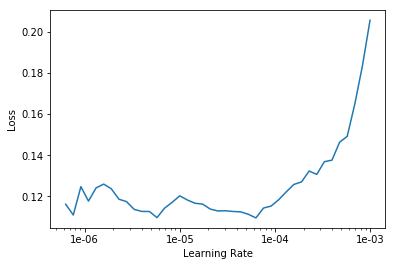

In [44]:
# Look for the longest steppest downward slope in general
learn.recorder.plot()


In [45]:
learn.fit_one_cycle(8, max_lr=slice(1e-05,3e-04))


epoch,train_loss,valid_loss,error_rate,time
0,0.122708,0.144130,0.042152,00:54
1,0.147928,0.143216,0.042152,00:55
2,0.122615,0.141702,0.040658,00:55
3,0.103155,0.118288,0.034380,00:55
4,0.069179,0.108120,0.032287,00:55
5,0.048983,0.095907,0.030194,00:55
6,0.031147,0.090210,0.026308,00:55
7,0.034229,0.091614,0.027504,00:55


In [46]:
learn.save('stage-2')


We imporved our model slightly by having more epochs and changing the learning rate. On last epochs the error rate started to increase which could be an indication that any more training may overfit.


### Interpretation

Confusion matrix for this many classes isn't appropiate but normally this would be a nice visual overview of how everything is going and indicate classes that are causing more errors.

In [67]:
#learn.load('stage-2')
learn.load('stage-2')


Learner(data=ImageDataBunch;

Train: LabelList (13384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK
Path: ../../../storage/Birds/BIRDS-120/consolidated;

Valid: LabelList (3345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FLAME TANAGER,BALTIMORE ORIOLE,BLUE HERON,BROWN THRASHER,CINNAMON TEAL
Path: ../../../storage/Birds/BIRDS-120/consolidated;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64,

In [37]:
interp = ClassificationInterpretation.from_learner(learn)


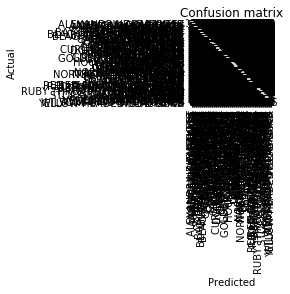

In [38]:
interp.plot_confusion_matrix()


This is where domain knowledge comes in handy as you may be able to find reasons for the most common errors. It may be the case that some bird species are very similar and hard for humans to distinguish 

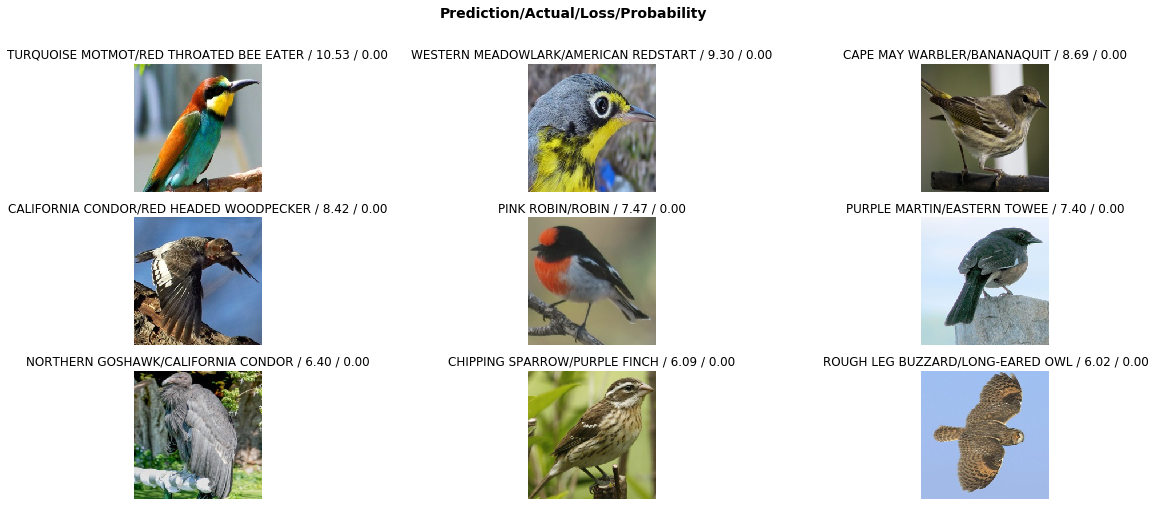

In [56]:
interp.plot_top_losses(9,figsize=(20,8))

In [55]:
interp.most_confused(min_val=3)

[('PURPLE FINCH', 'HOUSE FINCH', 6),
 ('PINK ROBIN', 'ROBIN', 4),
 ('CALIFORNIA GULL', 'ALBATROSS', 3),
 ('COUCHS KINGBIRD', 'NORTHERN MOCKINGBIRD', 3),
 ('FLAME TANAGER', 'AMERICAN GOLDFINCH', 3),
 ('LARK BUNTING', 'HOUSE SPARROW', 3)]

### Cleaning Data

In [49]:
from fastai.widgets import *


This section allows you to plot your top losses. This was created through the use of widgets, to create your own widgets google ipywidgets. This is something I plan to learn more deeply after the course.

We know this dataset is clean so this is more my own understanding of fast.ai


In order to clean all our data we create a new databunch with the split. We can get the index of our top losses from the function __.from_toplosses()__ and then remove these images using __ImageCLeaner()__. 

This does not modidy the exisiting data but creates a new csv file __cleaned.csv__ that you can create a new databunch with correct labels to train

In [50]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


In [51]:
db


ImageDataBunch;

Train: LabelList (16729 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK,MANDRIN DUCK
Path: ../../../storage/Birds/BIRDS-120/consolidated;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: ../../../storage/Birds/BIRDS-120/consolidated;

Test: None

In [52]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');


First this is how you'd remove any duplicate images.

In [53]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [57]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Then how you would remove or re-label any data in our current dataset. 

In [58]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [59]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Lastly this is how you would re-train the model using the cleaned dataset.

In [41]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="cleaned.csv", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [42]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(8)

### Deployment using Render

Follow the steps to upload on render but at the moment I don't want to pay $7 a month to host. 

Export data and download model with the following code, it will create a export.pkl in your directory.

In [71]:
learn.export()

Then follow the steps from https://course.fast.ai/deployment_render.html to upload the model on render. 

This will be based on a template fast.ai has given. Make repository from the link https://github.com/render-examples/fastai-v3